<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/Recreate_Interest_vs_Principal_Graph_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
# load the df
filename = '/content/drive/MyDrive/Colab Notebooks/mortgages.csv'
df = pd.read_csv(filename)

In [83]:
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [84]:
df.describe()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Interest Rate
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,150.500000,233244.608139,2265.486667,783.991750,1481.494917,231763.113222,0.040000
std,99.544421,114887.600674,540.507327,450.838445,654.272215,115306.391990,0.010005
min,1.000000,1677.040000,1686.420000,4.190000,480.630000,-7.170000,0.030000
25%,68.000000,139742.220000,1686.420000,426.787500,914.170000,137885.062500,0.030000
50%,135.500000,249413.115000,2147.290000,761.580000,1392.465000,247956.530000,0.040000
75%,225.250000,335027.117500,2762.330000,1085.610000,1967.187500,333740.135000,0.050000
max,360.000000,400000.000000,3163.170000,1666.660000,3150.050000,399519.370000,0.050000


In [85]:
df.shape

(1080, 8)

In [86]:
# Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.
mortgage_filter = df['Mortgage Name'] == '30 Year'
len(df[mortgage_filter])

720

In [87]:
# Create a filter for an interest rate of 3% (notice how it is written in the data!).
interest_rate3 = df['Interest Rate'] == 0.03
df[interest_rate3]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
895,176,13706.74,2762.33,34.26,2728.07,10978.67,15 Year,0.03
896,177,10978.67,2762.33,27.44,2734.89,8243.78,15 Year,0.03
897,178,8243.78,2762.33,20.60,2741.73,5502.05,15 Year,0.03
898,179,5502.05,2762.33,13.75,2748.58,2753.47,15 Year,0.03


In [88]:
# Define a new dataframe based on both the year and the interest filters you have created.
interest3 = df[(mortgage_filter & interest_rate3)]
interest3.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [89]:
# We have a choice for the 5% interest rate:
# We can just create another filter where df.['Interest Rate'] == .05 
interest_rate5 = df['Interest Rate'] == 0.05
df[interest_rate5]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
1075,176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
1076,177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
1077,178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05
1078,179,6286.86,3163.17,26.19,3136.98,3149.88,15 Year,0.05


In [90]:
# Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum().
# What are the first three values in the output for the cumulative sum of the 3% rate? 1000.00, 1998.28, 2994.84
interest3['Total Interest 3%'] = interest3[(interest3['Mortgage Name'] == '30 Year') & (interest3['Interest Rate'] == 0.03)]['Interest Paid'].cumsum()
interest3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,Total Interest 3%
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03,1000.00
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03,1998.28
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03,2994.84
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03,3989.67
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03,4982.77


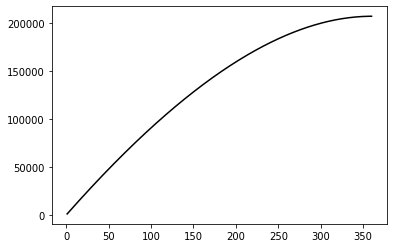

In [91]:
# Use plt.plot(x, y, c=color) to plot the black line (5%).
# We want the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid.
# You can use the code from the previous question to define your y values within the plt.plot() function!  Hint: for black, c = 'k'
x = interest3['Month'].values
y = interest3['Total Interest 3%'].values

plt.plot(x, y, c = 'k');

In [92]:
# create df for interest rate 5%
interest5 = df
interest5.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [93]:
# total interest paid for 30 year at 5%
interest5[(interest5['Mortgage Name'] == '30 Year') & (interest5['Interest Rate'] == 0.05)]['Interest Paid'].cumsum()

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

In [94]:
# combine 30 year filter with 5% interest rate filter
mortgage_filter5 = df[(mortgage_filter & interest_rate5)]

In [105]:
# To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!
# Submit your code and reproduced graph! Hint: for blue, c = 'b'
interest5['Total Interest 5%'] = interest5[(interest5['Mortgage Name'] == '30 Year') & (interest5['Interest Rate'] == 0.05)]['Interest Paid'].cumsum()

In [109]:
# somehow the total interest 5% is showing up as NaN instead of float unline total interest rate 3%
interest5.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,Total Interest 5%
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03,NaN
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03,NaN
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03,NaN
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03,NaN
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03,NaN


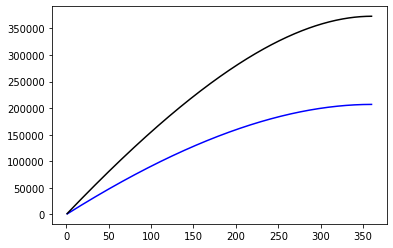

In [114]:
# unable to recreate graph as 'Total Interest 5%' is somehow being displayed as NaN
x = interest3['Month'].values
y = interest3['Total Interest 3%'].values
a = interest5['Month'].values
b = interest5['Total Interest 5%'].values

plt.plot(x, y, c = 'b');
plt.plot(a, b, c = 'k');